<a href="https://colab.research.google.com/github/Timur99/derivatives/blob/main/Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1

In [ ]:
import numpy as np
from scipy.stats import uniform, norm, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from math import sqrt
from numpy.random import normal

S_0 = 1
r = 0.01
sigma = 0.1
T = 1

In [ ]:
#N = normal(loc=0, scale=T, size=10)
#print(N)


[-1.10061918  1.14472371  0.90159072  0.50249434  0.90085595 -0.68372786
 -0.12289023 -0.93576943 -0.26788808  0.53035547]


In [ ]:
#N_n = np.random.normal(0,T,10)
#print(N_n)

[ 1.20205486  0.28474811  0.26246745  0.2764993  -0.7332716   0.83600472
  1.54335911  0.75880566  0.88490881 -0.87728152]


In [ ]:
def aver_s(S_0, r, sigma, T, N_n):
  len_N_n = len(N_n)
  S_t = 0
  for i in N_n:
    S_t += S_0 * math.exp(((r-((sigma**2)/2))*T) + sigma*i)
  S_res = S_t / len_N_n
  D = abs(S_res - S_0 *  math.exp(r*T))
  return(D)
  #return(S_res)
aver_s(S_0, r, sigma, T, N_n)



0.00011824601405474588

100%|██████████| 9999/9999 [00:27<00:00, 359.95it/s]


<function matplotlib.pyplot.show(*args, **kw)>

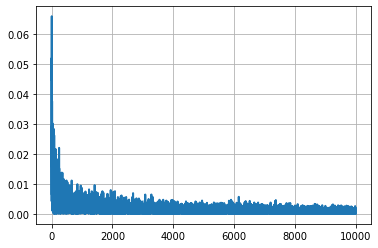

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm  
from time import sleep


a = []
G = []
x = G
y = a


for j in tqdm(range(1, 10000)):
  g = 1*j
  G.append(g)
  N_n = np.random.normal(0,T,g)
  a.append(aver_s(S_0, r, sigma, T, N_n))



fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)
ax.grid()
plt.show


In [ ]:
a



[0.03024024083591259,
 0.0028480433871103106,
 0.013181309883280035,
 0.00737568510414377,
 0.009415670794059139,
 0.009845238646983168]

100%|██████████| 999/999 [00:05<00:00, 171.36it/s]


[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.011, 0.012, 0.013000000000000001, 0.014, 0.015, 0.016, 0.017, 0.018000000000000002, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026000000000000002, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036000000000000004, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043000000000000003, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051000000000000004, 0.052000000000000005, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059000000000000004, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.07100000000000001, 0.07200000000000001, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.08600000000000001, 0.08700000000000001, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.10200000000000001, 0.10300000000000001, 0.10400000000000001, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0

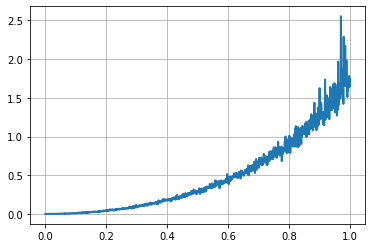

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm  
from time import sleep
T = 2
S_0 = 1
r = 0.01
sigma = 0.001

a = []
Sig = []
X = Sig
Y = a


for j in tqdm(range(1, 1000)):
  N_n = np.random.normal(0,T,10000)
  h = sigma*j
  Sig.append(h)
  a.append(aver_s(S_0, r, h, T, N_n))

print(Sig, a)
fig, ax2 = plt.subplots()
ax2.plot(X, Y, linewidth=2.0)
ax2.grid()
plt.show()

A2


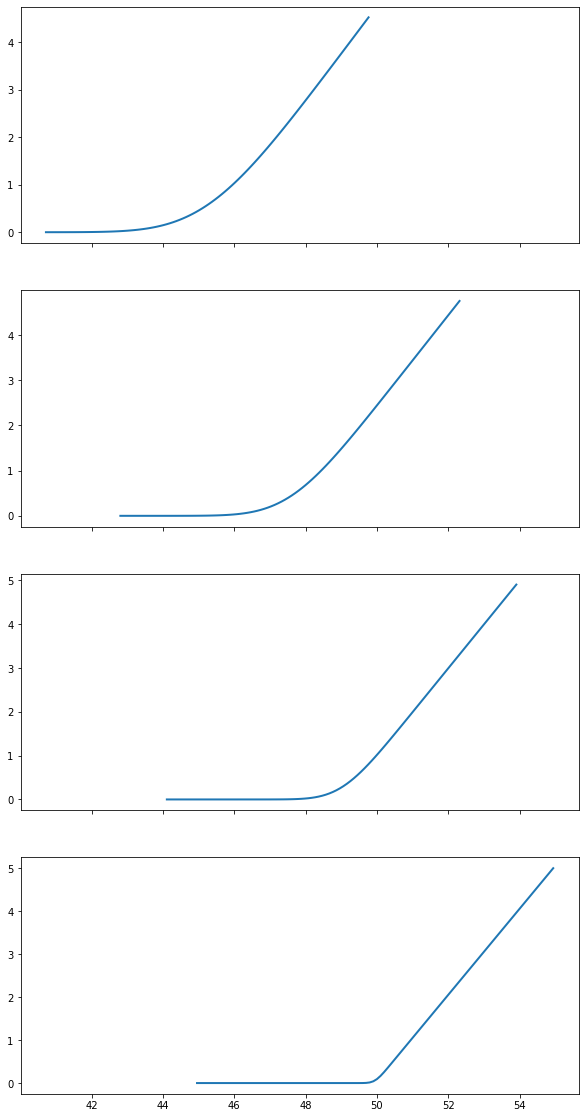

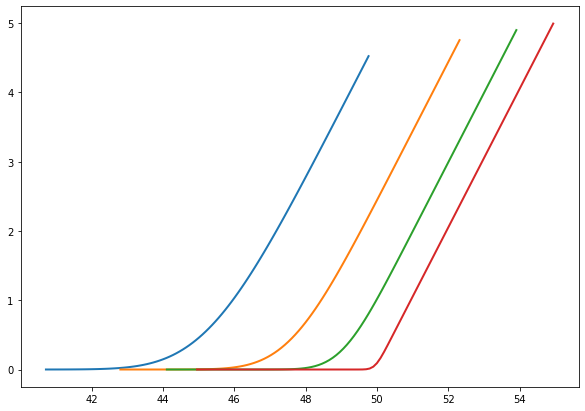

In [ ]:
from scipy import stats

import random

K = 50
T = 10
S_0 = 1
r = 0.01
sigma = 0.01

t = [0, 0.5 * T, 0.8 * T, 0.99 * T]


def CallOp(T,t,r,K,sigma, x):
  d1 = (1/(sigma*np.sqrt(T-t)))*(np.log(x/K)+(r+0.5*sigma**2)*(T-t))
  d2 = (1/(sigma*np.sqrt(T-t)))*(np.log(x/K)+(r-0.5*sigma**2)*(T-t))
  call = (x * stats.norm.cdf(d1) - K * np.exp(-r * (T-t)) * stats.norm.cdf(d2))
  return(call)

fig, axes = plt.subplots(4, 1, figsize=(10, 20), sharex=True)
fig2, axes_common = plt.subplots(figsize=(10, 7))

for i, ax in zip(t, axes):
  C = []
  a = K*np.exp(-r*(T-i))*0.9
  b = K*np.exp(-r*(T-i))*1.1
  xs = np.linspace(a, b, 100)
  for x in xs:
    C.append(CallOp(T,i,r,K,sigma, x))
  ax.plot(xs, C, lw=2)
  axes_common.plot(xs, C, lw=2)

# print(t, C)
# fig, ax3 = plt.subplots()
# ax3.plot(t, C, linewidth=2.0)
# ax3.grid()
# plt.show()

A3


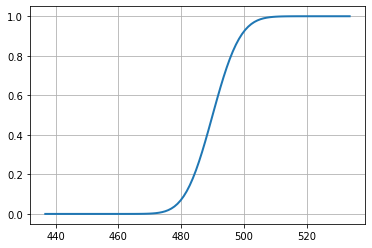

In [ ]:
from scipy import stats
from sympy import *
import random
import numpy as np
from scipy.stats import uniform, norm, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt
from numpy.random import normal

K = 500
T = 3
t = 1
S_0 = 1
r = 0.01
sigma = 0.01


delta = []
a = K*np.exp(-r*(T))*0.9
b = K*np.exp(-r*(T))*1.1
xs = np.linspace(a, b, 100)
for j in xs:
  delta.append(stats.norm.cdf((1/(sigma*np.sqrt(T-t)))*(np.log(j/K)+(r+0.5*(sigma**2))*(T-t))))
print(C) 
fig, ax = plt.subplots()
ax.plot(xs, delta, linewidth=2.0)
ax.grid()
plt.show()



<function matplotlib.pyplot.show(*args, **kw)>

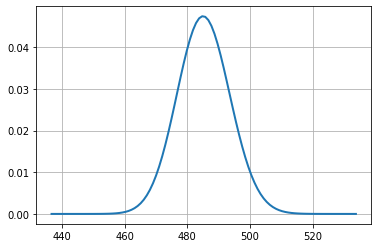

In [ ]:
Gamma = []
a = K*np.exp(-r*(T))*0.9
b = K*np.exp(-r*(T))*1.1
xs = np.linspace(a, b, 100)
for j in xs:
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
  Gamma.append((1/(np.sqrt(2*math.pi)))* np.exp(-(d1**2)/2) * (1/(j*sigma* np.sqrt(T))))
print(C) 
fig, ax = plt.subplots()
ax.plot(xs, Gamma, linewidth=2.0)
ax.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

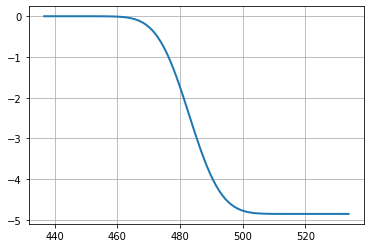

In [ ]:
Teta = []
a = K*np.exp(-r*(T))*0.9
b = K*np.exp(-r*(T))*1.1
xs = np.linspace(a, b, 100)
for j in xs:
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
  Teta.append(((-j)*sigma*np.exp(-(d1**2)/2))/(2*(np.sqrt(2*math.pi))*np.sqrt(T)) - (r*K*np.exp(-r * (T)) * stats.norm.cdf(d2)))
print(C) 
fig, ax = plt.subplots()
ax.plot(xs, Teta, linewidth=2.0)
ax.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

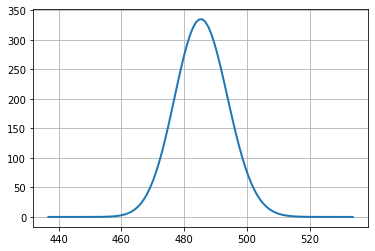

In [ ]:

vega = []
a = K*np.exp(-r*(T))*0.9
b = K*np.exp(-r*(T))*1.1
xs = np.linspace(a, b, 100)
for j in xs:
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
  vega.append((j*np.sqrt(T))/(np.sqrt(2*math.pi)) * np.exp(-(d1**2)/2))
print(C) 
fig, ax = plt.subplots()
ax.plot(xs, vega, linewidth=2.0)
ax.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

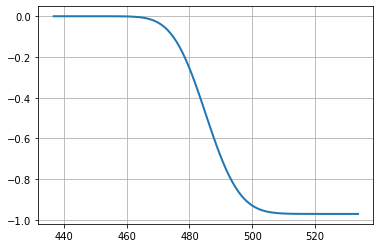

In [ ]:
strike = []
a = K*np.exp(-r*(T))*0.9
b = K*np.exp(-r*(T))*1.1
xs = np.linspace(a, b, 100)
for j in xs:
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
  strike.append(-np.exp(-r*T)*stats.norm.cdf(d2))
print(C) 
fig, ax4 = plt.subplots()
ax4.plot(xs, strike, linewidth=2.0)
ax4.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

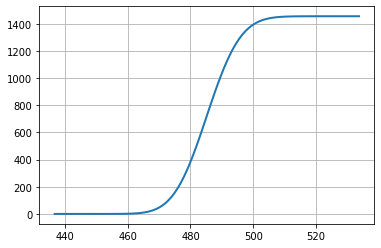

In [ ]:
percent = []
a = K*np.exp(-r*(T))*0.9
b = K*np.exp(-r*(T))*1.1
xs = np.linspace(a, b, 100)
for j in xs:
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
  percent.append(K*T*np.exp(-r*T)*stats.norm.cdf(d2))
print(C) 
fig, ax4 = plt.subplots()
ax4.plot(xs, percent, linewidth=2.0)
ax4.grid()
plt.show

B1

<ipython-input-7-61a01aba6596>:27: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
<ipython-input-7-61a01aba6596>:28: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
<ipython-input-7-61a01aba6596>:27: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
<ipython-input-7-61a01aba6596>:28: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
<ipython-input-7-61a01aba6596>:27: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
<ipython-input-7-61a01aba6596>:28: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
<ipython-input-7-61a01aba6596>:27: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigm

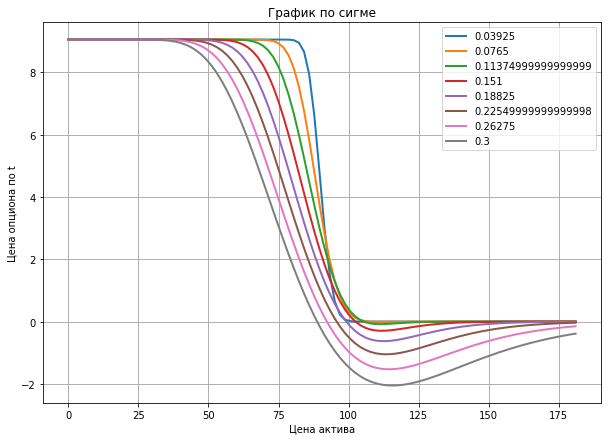

In [ ]:
from scipy import stats
from sympy import *
import random
import numpy as np
from scipy.stats import uniform, norm, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt
from numpy.random import normal

K = 100
T = 1
#S_0 = 1
r = 0.1

fig, ax = plt.subplots()

a = K*np.exp(-r*(T))*0.0
b = K*np.exp(-r*(T))*2.0
xs = np.linspace(a, b, 100)
l = np.linspace(0.002, 0.3, 9)
#print(xs,l)
for sigma in l[1:]:
  Teta = []
  for j in xs:
    d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
    d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
    Teta.append(((-j)*sigma*np.exp(-(d1**2)/2))/(2*(np.sqrt(2*math.pi))*np.sqrt(T)) + (r*K*np.exp(-r * (T)) * stats.norm.cdf(-d2)))
  ax.plot(xs, Teta, label=sigma, linewidth=2.0)
  ax.grid(linewidth = 1)
  plt.legend()
  fig.set_figwidth(10)
  fig.set_figheight(7)
  plt.title('График по сигме')
  plt.xlabel('Цена актива')
  plt.ylabel('Цена опциона по t')
plt.show()

<ipython-input-27-9d477e64d7f9>:17: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
<ipython-input-27-9d477e64d7f9>:18: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
<ipython-input-27-9d477e64d7f9>:17: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
<ipython-input-27-9d477e64d7f9>:18: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
<ipython-input-27-9d477e64d7f9>:17: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
<ipython-input-27-9d477e64d7f9>:18: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
<ipython-input-27-9d477e64d7f9>:17: RuntimeWarning: divide by zero encountered in log
  d1 = (

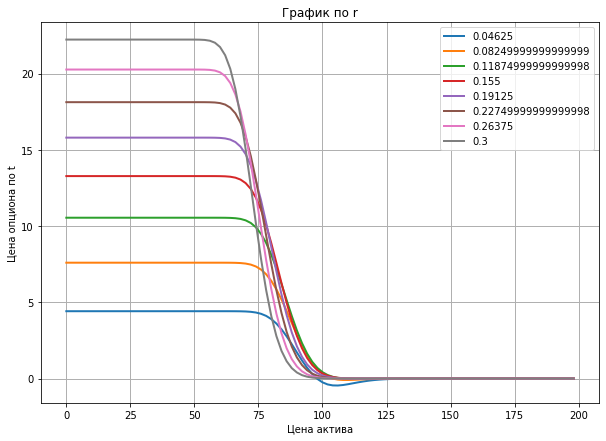

In [ ]:
K = 100
T = 1
#S_0 = 1
R = 0.01
sigma = 0.1

fig, ax = plt.subplots()

a = K*np.exp(-R*(T))*0.0
b = K*np.exp(-R*(T))*2.0
xs = np.linspace(a, b, 100)
l = np.linspace(0.01, 0.3, 9)
#print(xs,l)
for r in l[1:]:
  Teta = []
  for j in xs:
    d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
    d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
    Teta.append(((-j)*sigma*np.exp(-(d1**2)/2))/(2*(np.sqrt(2*math.pi))*np.sqrt(T)) + (r*K*np.exp(-r * (T)) * stats.norm.cdf(-d2)))
  ax.plot(xs, Teta, label=r, linewidth=2.0)
  ax.grid(linewidth = 1)
  plt.legend()
  fig.set_figwidth(10)
  fig.set_figheight(7)
  plt.title('График по r')
  plt.xlabel('Цена актива')
  plt.ylabel('Цена опциона по t')
plt.show()

A4


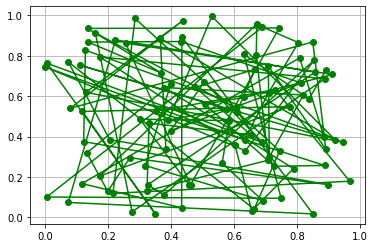

In [ ]:
#это не дз)

x = np.random.random(100)
y = np.random.random(100)


fig, ax = plt.subplots()

ax.plot(x,y, 'go-', label = "dsf")
plt.grid()
plt.show()

<ipython-input-18-c2ea7ab89e9e>:17: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
<ipython-input-18-c2ea7ab89e9e>:18: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
<ipython-input-18-c2ea7ab89e9e>:17: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
<ipython-input-18-c2ea7ab89e9e>:18: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
<ipython-input-18-c2ea7ab89e9e>:17: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
<ipython-input-18-c2ea7ab89e9e>:18: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
<ipython-input-18-c2ea7ab89e9e>:17: RuntimeWarning: divide by zero encountered in log
  d1 = (

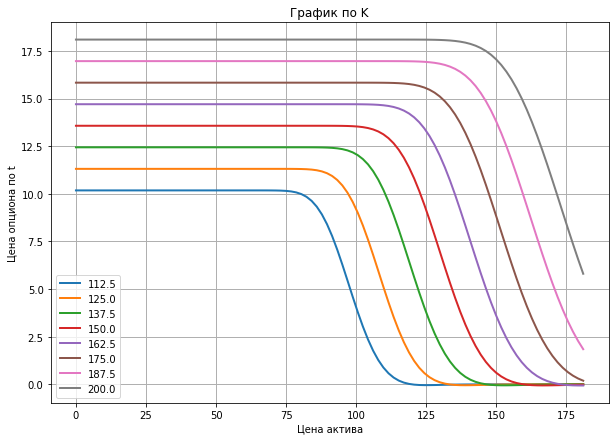

In [ ]:
K = 100
T = 1
#S_0 = 1
r = 0.1
sigma = 0.1

fig, ax = plt.subplots()

a = K*np.exp(-r*(T))*0.0
b = K*np.exp(-r*(T))*2.0
xs = np.linspace(a, b, 100)
l = np.linspace(100, 200, 9)
#print(xs,l)
for K in l[1:]:
  Teta = []
  for j in xs:
    d1 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r+0.5*sigma**2)*(T))
    d2 = (1/(sigma*np.sqrt(T)))*(np.log(j/K)+(r-0.5*sigma**2)*(T))
    Teta.append(((-j)*sigma*np.exp(-(d1**2)/2))/(2*(np.sqrt(2*math.pi))*np.sqrt(T)) + (r*K*np.exp(-r * (T)) * stats.norm.cdf(-d2)))
  ax.plot(xs, Teta, label=K, linewidth=2.0)
  ax.grid(linewidth = 1)
  plt.legend()
  fig.set_figwidth(10)
  fig.set_figheight(7)
  plt.title('График по K')
  plt.xlabel('Цена актива')
  plt.ylabel('Цена опциона по t')
plt.show()

<ipython-input-26-3018667eb095>:18: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T-t)))*(np.log(j/K)+(r+0.5*sigma**2)*(T-t))
<ipython-input-26-3018667eb095>:19: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T-t)))*(np.log(j/K)+(r-0.5*sigma**2)*(T-t))
<ipython-input-26-3018667eb095>:18: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T-t)))*(np.log(j/K)+(r+0.5*sigma**2)*(T-t))
<ipython-input-26-3018667eb095>:19: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T-t)))*(np.log(j/K)+(r-0.5*sigma**2)*(T-t))
<ipython-input-26-3018667eb095>:18: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T-t)))*(np.log(j/K)+(r+0.5*sigma**2)*(T-t))
<ipython-input-26-3018667eb095>:19: RuntimeWarning: divide by zero encountered in log
  d2 = (1/(sigma*np.sqrt(T-t)))*(np.log(j/K)+(r-0.5*sigma**2)*(T-t))
<ipython-input-26-3018667eb095>:18: RuntimeWarning: divide by zero enc

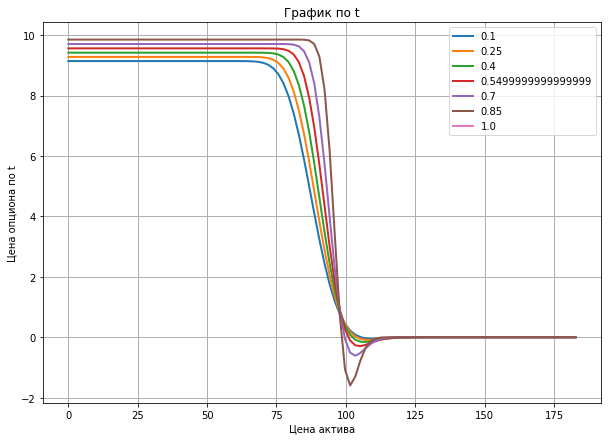

In [ ]:
K = 100
T = 1
#S_0 = 1
r = 0.1
sigma = 0.1
t = 0.1

fig, ax = plt.subplots()

a = K*np.exp(-r*(T-t))*0.0
b = K*np.exp(-r*(T-t))*2.0
xs = np.linspace(a, b, 100)
l = np.linspace(0.1, 1, 7)
#print(xs,l)
for t in l:
  Teta = []
  for j in xs:
    d1 = (1/(sigma*np.sqrt(T-t)))*(np.log(j/K)+(r+0.5*sigma**2)*(T-t))
    d2 = (1/(sigma*np.sqrt(T-t)))*(np.log(j/K)+(r-0.5*sigma**2)*(T-t))
    Teta.append(((-j)*sigma*np.exp(-(d1**2)/2))/(2*(np.sqrt(2*math.pi))*np.sqrt(T-t)) + (r*K*np.exp(-r * (T-t)) * stats.norm.cdf(-d2)))
  ax.plot(xs, Teta, label=t, linewidth=2.0)
  ax.grid(linewidth = 1)
  plt.legend()
  fig.set_figwidth(10)
  fig.set_figheight(7)
  plt.title('График по t')
  plt.xlabel('Цена актива')
  plt.ylabel('Цена опциона по t')
plt.show()

In [ ]:
А4

NameError: ignored

А4
